In [1]:
import numpy as np
import matplotlib.pyplot as plt
X_train = np.load("reshaped_14.npy")

In [2]:
hidden_nodes = 225
epochs = 1
lr = 1e-4
samples = 60000
input_size = 196
X = X_train.reshape(samples,input_size)
X = X/255.0
Lambda = 1
s = 0.1
# defining functions

def sigm(x):
    return 1/(1+np.exp(-x))

def diff_sigm(x):
    return (sigm(x)-(sigm(x)**2))

def layer(x,W,b):
    return np.matmul(x,W)+b

W1 = np.random.normal(0,1,(input_size,hidden_nodes))
Bi1 = np.random.normal(0,1,(1,hidden_nodes))
W2 = np.random.normal(0,1,(hidden_nodes,input_size))
Bi2 = np.random.normal(0,1,(1,input_size))

In [3]:
epochs = 50
for i in range(epochs):
    loss = 0
    w1 = np.zeros(W1.shape)
    b1 = np.zeros(Bi1.shape)
    w2 = np.zeros(W2.shape)
    b2 = np.zeros(Bi2.shape)
    S  = np.zeros(W1.shape)
    #forward pass
    out1 = layer(X,W1,Bi1)
    z = sigm(out1)
    out2 = layer(z,W2,Bi2)
    y = sigm(out2)
    #BACKPROPAGATION
    del1 = 2*(y-X)*diff_sigm(out2)
    b2 = np.sum(del1, axis = 0).reshape(np.shape(Bi2))
    w2 = np.matmul(z.T,del1)
    zm = np.mean(z,axis = 0)
#     print(z.shape,zm.shape)
    ge = (Lambda)*(-s/zm + (1-s)/(1-zm))*diff_sigm(out1)
#     print(ge.shape)
    s1 = ge+(diff_sigm(out1)*np.matmul(del1,W2.T))
#     print(s1.shape, Bi1.shape,del1.shape, W2.shape,ge.shape)
    b1 = np.sum(s1,axis=0).reshape(np.shape(Bi1))
    w1 = np.matmul(X.T,s1)
    loss = np.sum(np.linalg.norm(y-X)**2)
    print(i,loss)
    W1 -= lr*w1
    W2 -= lr*w2
    Bi1 -= lr*b1
    Bi2 -= lr*b2

(0, 5458532.883979287)
(1, 2604511.9914914398)
(2, 1581322.5294926732)
(3, 1323461.1843534175)
(4, 1069981.9319761302)
(5, 1024444.7045422911)
(6, 909432.1976240358)
(7, 853888.5826121948)
(8, 826073.1809969274)
(9, 763035.5296672074)
(10, 747735.0479583815)
(11, 699094.7539423386)
(12, 704595.023796729)
(13, 652669.7904566198)
(14, 668689.989731941)
(15, 612222.8977387238)
(16, 626486.3672102724)
(17, 578181.3825282342)
(18, 589788.8154212255)
(19, 549846.6811016975)
(20, 558909.7367053854)
(21, 526447.8438364313)
(22, 529283.3345263565)
(23, 502361.6794383895)
(24, 501236.65500017424)
(25, 481445.80208271014)
(26, 477295.6293118304)
(27, 462644.2269777023)
(28, 457255.3125908197)
(29, 446166.0694123694)
(30, 440114.0573603701)
(31, 431575.41795986664)
(32, 425242.28810943046)
(33, 419083.50820182863)
(34, 412683.8395312651)
(35, 409823.3049406851)
(36, 403557.8873063409)
(37, 403733.19933141174)
(38, 396081.20095558604)
(39, 394336.91737797874)
(40, 389448.84592948)
(41, 388580.97897

In [4]:
out1 = layer(X,W1,Bi1)
z = sigm(out1)
out2 = layer(z,W2,Bi2)
y = sigm(out2)
y = y*255.0

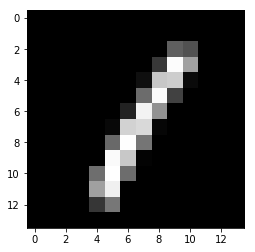

In [13]:
plt.imshow(X[3].reshape(14,14) , cmap='gray')

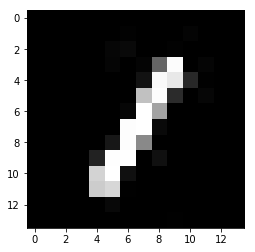

In [14]:
plt.imshow(y[3].reshape(14,14) , cmap='gray' )

In [12]:
count = 0
for i in range(len(z[1])):
    if(z[1][i] > 0.01):
        count += 1
print(count,len(z[1]))

print(np.mean(z[1]))


(82, 225)
0.10368805539723742
